In [1]:
'''
Importing libraries
'''

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

from scipy.stats import moment
from scipy.stats import describe

In [2]:
describe([1,2,3,4,5,6])[2:]

(3.5, 3.5, 0.0, -1.2685714285714282)

# Function to compute basic stats of noun phrases errors

In [3]:
def basic_stats_error(datalist):
    
    if len(datalist)>1:
        result_describe = list(describe(datalist)[2:])
        result_percentile = result_describe + list(np.percentile(datalist,[10,25,50,75,90]))
        array = np.array(datalist)
        result_percentile = result_percentile+[len(array),len(array[np.where(array>0)[0]])/len(array)*100,
                                               len(array[np.where(array<0)[0]])/len(array)*100]
    else:
        result_percentile = []

    return result_percentile

# Function to "explote" varios colums of lists to rows (Pandas)

In [4]:
def explode(df, lst_cols, fill_value=''):
    # make sure `lst_cols` is a list
    if lst_cols and not isinstance(lst_cols, list):
        lst_cols = [lst_cols]
    # all columns except `lst_cols`
    idx_cols = df.columns.difference(lst_cols)

    # calculate lengths of lists
    lens = df[lst_cols[0]].str.len()

    if (lens > 0).all():
        # ALL lists in cells aren't empty
        return pd.DataFrame({
            col:np.repeat(df[col].values, df[lst_cols[0]].str.len())
            for col in idx_cols
        }).assign(**{col:np.concatenate(df[col].values) for col in lst_cols}) \
          .loc[:, df.columns]
    else:
        # at least one list in cells is empty
        return pd.DataFrame({
            col:np.repeat(df[col].values, df[lst_cols[0]].str.len())
            for col in idx_cols
        }).assign(**{col:np.concatenate(df[col].values) for col in lst_cols}) \
          .append(df.loc[lens==0, idx_cols]).fillna(fill_value) \
          .loc[:, df.columns]

# Read Noun phrases

In [5]:
noun_sentence_df_final_reindex_df = pd.read_feather('noun_sentence_df_final_reindex_df.fea')

In [6]:
noun_sentence_df_final_reindex_df

,index,AVM_Error_List,Listing_Error_List,Listingid_List,noun_sentence_corrections_embeddings
0,new bathrooms,"[0.10878560975609752, 0.0656260194174757, 0.25...","[0.024878048780487806, 0.032362459546925564, -...","[229017180, 229329212, 215966190, 231445008, 1...","[-0.011923872, -0.040925846, -0.060033374, -0...."
1,new vanities,"[0.2046909923664122, 0.25085974999999994, 0.31...","[-0.029770992366412213, -0.07416666666666667, ...","[226851936, 227207328, 228059944, 228694545, 2...","[-0.05858002, -0.078841336, 0.007744186, -0.04..."
2,quartz countertops,"[0.07266934782608703, 0.04711003921568624, 0.2...","[0.0, 0.021568627450980392, 0.0, -0.1217073170...","[227301599, 227066289, 227003853, 228078778, 2...","[-0.030976344, 0.010525043, 0.008025839, -0.02..."
3,top bottom,"[-0.17483815668202762, 0.14467078688524593, 0....","[-0.03686635944700461, -0.04885245901639344, -...","[226661263, 227553043, 227207328, 227436501, 2...","[-0.055551246, -0.050620284, 0.022666093, 0.04..."
4,new kitchen cabinets,"[0.3935276169265033, -0.02473273949579835, 0.2...","[0.16481069042316257, -0.008067226890756302, -...","[226027366, 227018382, 228973883, 229099586, 2...","[-0.0027903197, 0.035919096, -0.03295671, -0.0..."
...,...,...,...,...,...
5416,seller requests buyer use seller,"[-1.3322289999999999, 0.16222735849056613, -0....","[-0.25, -0.1320754716981132, 0.042553191489361...","[198263962, 200651017, 209001692, 212786867, 1...","[-0.071547754, -0.007990354, 0.044830173, 0.01..."
5417,great home investors,"[0.2702147777777778, -0.23938986666666673, -0....","[-0.1, -0.19866666666666666, -0.08790322580645...","[197054770, 3232636, 151180267, 130595497, 532...","[-0.021865588, -0.05759102, -0.037234746, -0.0..."
5418,needs repairs,"[-0.7064920000000001, -0.2677977391304347, -0....","[-0.047619047619047616, -0.08695652173913043, ...","[230618952, 187242734, 196407010, 139519327, 5...","[-0.04354262, -0.037721384, 0.010220117, 0.044..."
5419,seller chooses attorney,"[0.06298180555555555, -0.2739625714285714, -0....","[0.02847222222222222, -0.2571428571428571, -0....","[77911179, 189586243, 180510904, 77958589, 854...","[-0.05809925, -0.012980465, -0.021596901, 0.03..."


In [7]:
noun_sentence_df_final_reindex_df['AVM_Error_Indicators'] = noun_sentence_df_final_reindex_df['AVM_Error_List'].apply(lambda x: basic_stats_error(x))

In [8]:
noun_sentence_df_final_reindex_df['Listing_Error_Indicators'] = noun_sentence_df_final_reindex_df['Listing_Error_List'].apply(lambda x: basic_stats_error(x))

In [9]:
noun_sentence_df_final_reindex_df

,index,AVM_Error_List,Listing_Error_List,Listingid_List,noun_sentence_corrections_embeddings,AVM_Error_Indicators,Listing_Error_Indicators
0,new bathrooms,"[0.10878560975609752, 0.0656260194174757, 0.25...","[0.024878048780487806, 0.032362459546925564, -...","[229017180, 229329212, 215966190, 231445008, 1...","[-0.011923872, -0.040925846, -0.060033374, -0....","[0.12710563082025159, 0.03797707814719036, -0....","[-0.04844011373672176, 0.0064442156371367285, ..."
1,new vanities,"[0.2046909923664122, 0.25085974999999994, 0.31...","[-0.029770992366412213, -0.07416666666666667, ...","[226851936, 227207328, 228059944, 228694545, 2...","[-0.05858002, -0.078841336, 0.007744186, -0.04...","[0.10859357389313391, 0.03146946706234901, 0.2...","[-0.03939157831539426, 0.006370195642863663, -..."
2,quartz countertops,"[0.07266934782608703, 0.04711003921568624, 0.2...","[0.0, 0.021568627450980392, 0.0, -0.1217073170...","[227301599, 227066289, 227003853, 228078778, 2...","[-0.030976344, 0.010525043, 0.008025839, -0.02...","[0.10278558717924147, 0.0300275849369525, 0.28...","[-0.028740320391495287, 0.004150199369384, -3...."
3,top bottom,"[-0.17483815668202762, 0.14467078688524593, 0....","[-0.03686635944700461, -0.04885245901639344, -...","[226661263, 227553043, 227207328, 227436501, 2...","[-0.055551246, -0.050620284, 0.022666093, 0.04...","[0.10252106060171957, 0.029362176033909306, 0....","[-0.043342693333633595, 0.007001744630591242, ..."
4,new kitchen cabinets,"[0.3935276169265033, -0.02473273949579835, 0.2...","[0.16481069042316257, -0.008067226890756302, -...","[226027366, 227018382, 228973883, 229099586, 2...","[-0.0027903197, 0.035919096, -0.03295671, -0.0...","[0.06340595598520059, 0.03147137287306286, -0....","[-0.04346559322269676, 0.007035101596761944, -..."
...,...,...,...,...,...,...,...
5416,seller requests buyer use seller,"[-1.3322289999999999, 0.16222735849056613, -0....","[-0.25, -0.1320754716981132, 0.042553191489361...","[198263962, 200651017, 209001692, 212786867, 1...","[-0.071547754, -0.007990354, 0.044830173, 0.01...","[-0.38333426451694014, 0.14118332477478868, -0...","[-0.020515015912612608, 0.03274158365671943, -..."
5417,great home investors,"[0.2702147777777778, -0.23938986666666673, -0....","[-0.1, -0.19866666666666666, -0.08790322580645...","[197054770, 3232636, 151180267, 130595497, 532...","[-0.021865588, -0.05759102, -0.037234746, -0.0...","[-0.3949718558900011, 0.19840775937258184, -0....","[-0.09646376871182749, 0.021014897596130223, -..."
5418,needs repairs,"[-0.7064920000000001, -0.2677977391304347, -0....","[-0.047619047619047616, -0.08695652173913043, ...","[230618952, 187242734, 196407010, 139519327, 5...","[-0.04354262, -0.037721384, 0.010220117, 0.044...","[-0.4032442734091763, 0.14411336538546365, -0....","[-0.12695612324300912, 0.04233632919491009, -1..."
5419,seller chooses attorney,"[0.06298180555555555, -0.2739625714285714, -0....","[0.02847222222222222, -0.2571428571428571, -0....","[77911179, 189586243, 180510904, 77958589, 854...","[-0.05809925, -0.012980465, -0.021596901, 0.03...","[-0.4837196232059463, 0.1564176054870049, 0.07...","[-0.034887794557957034, 0.03955142645604079, -..."


In [10]:
columns_to_split = [ 'AVM_Error_Indicators',
                     'noun_sentence_corrections_embeddings', 'Listing_Error_Indicators']

In [11]:
for column in columns_to_split:
    nelements = (len(noun_sentence_df_final_reindex_df[column].values[0]))
    list_tmp = [str(i) for i in range(nelements)] 
    column_names = [column + '_' + str(i) for i in list_tmp] 
    print(column_names)
    split_df = pd.DataFrame(noun_sentence_df_final_reindex_df[column].tolist(), columns=column_names, 
                            index=noun_sentence_df_final_reindex_df.index)
    noun_sentence_df_final_reindex_df = pd.concat([noun_sentence_df_final_reindex_df, split_df], axis=1)
    noun_sentence_df_final_reindex_df = noun_sentence_df_final_reindex_df.drop(columns = [column])

['AVM_Error_Indicators_0', 'AVM_Error_Indicators_1', 'AVM_Error_Indicators_2', 'AVM_Error_Indicators_3', 'AVM_Error_Indicators_4', 'AVM_Error_Indicators_5', 'AVM_Error_Indicators_6', 'AVM_Error_Indicators_7', 'AVM_Error_Indicators_8', 'AVM_Error_Indicators_9', 'AVM_Error_Indicators_10', 'AVM_Error_Indicators_11']
['noun_sentence_corrections_embeddings_0', 'noun_sentence_corrections_embeddings_1', 'noun_sentence_corrections_embeddings_2', 'noun_sentence_corrections_embeddings_3', 'noun_sentence_corrections_embeddings_4', 'noun_sentence_corrections_embeddings_5', 'noun_sentence_corrections_embeddings_6', 'noun_sentence_corrections_embeddings_7', 'noun_sentence_corrections_embeddings_8', 'noun_sentence_corrections_embeddings_9', 'noun_sentence_corrections_embeddings_10', 'noun_sentence_corrections_embeddings_11', 'noun_sentence_corrections_embeddings_12', 'noun_sentence_corrections_embeddings_13', 'noun_sentence_corrections_embeddings_14', 'noun_sentence_corrections_embeddings_15', 'noun_

['Listing_Error_Indicators_0', 'Listing_Error_Indicators_1', 'Listing_Error_Indicators_2', 'Listing_Error_Indicators_3', 'Listing_Error_Indicators_4', 'Listing_Error_Indicators_5', 'Listing_Error_Indicators_6', 'Listing_Error_Indicators_7', 'Listing_Error_Indicators_8', 'Listing_Error_Indicators_9', 'Listing_Error_Indicators_10', 'Listing_Error_Indicators_11']


In [12]:
noun_sentence_df_final_reindex_df

,index,AVM_Error_List,Listing_Error_List,Listingid_List,AVM_Error_Indicators_0,AVM_Error_Indicators_1,AVM_Error_Indicators_2,AVM_Error_Indicators_3,AVM_Error_Indicators_4,AVM_Error_Indicators_5,...,Listing_Error_Indicators_2,Listing_Error_Indicators_3,Listing_Error_Indicators_4,Listing_Error_Indicators_5,Listing_Error_Indicators_6,Listing_Error_Indicators_7,Listing_Error_Indicators_8,Listing_Error_Indicators_9,Listing_Error_Indicators_10,Listing_Error_Indicators_11
0,new bathrooms,"[0.10878560975609752, 0.0656260194174757, 0.25...","[0.024878048780487806, 0.032362459546925564, -...","[229017180, 229329212, 215966190, 231445008, 1...",0.127106,0.037977,-0.790297,4.407672,-0.088080,0.018085,...,-1.745671,10.805401,-0.136763,-0.073896,-0.031910,0.000000,0.014048,1523,16.546290,71.240972
1,new vanities,"[0.2046909923664122, 0.25085974999999994, 0.31...","[-0.029770992366412213, -0.07416666666666667, ...","[226851936, 227207328, 228059944, 228694545, 2...",0.108594,0.031469,0.212011,0.471803,-0.094723,-0.007932,...,-3.040736,27.315701,-0.120503,-0.063493,-0.023588,0.000000,0.024392,1300,21.615385,65.307692
2,quartz countertops,"[0.07266934782608703, 0.04711003921568624, 0.2...","[0.0, 0.021568627450980392, 0.0, -0.1217073170...","[227301599, 227066289, 227003853, 228078778, 2...",0.102786,0.030028,0.289368,1.145147,-0.078895,-0.007084,...,-3.069676,38.605070,-0.096129,-0.050846,-0.016746,0.000000,0.024797,8006,23.632276,62.128404
3,top bottom,"[-0.17483815668202762, 0.14467078688524593, 0....","[-0.03686635944700461, -0.04885245901639344, -...","[226661263, 227553043, 227207328, 227436501, 2...",0.102521,0.029362,0.108785,0.419584,-0.086264,-0.005496,...,-3.329718,28.611827,-0.123978,-0.067416,-0.026224,0.000000,0.017868,1218,19.868637,67.569787
4,new kitchen cabinets,"[0.3935276169265033, -0.02473273949579835, 0.2...","[0.16481069042316257, -0.008067226890756302, -...","[226027366, 227018382, 228973883, 229099586, 2...",0.063406,0.031471,-0.391246,3.754868,-0.118490,-0.034712,...,-3.498838,34.002351,-0.126640,-0.067853,-0.025681,0.000000,0.019608,10890,19.651056,66.473829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5416,seller requests buyer use seller,"[-1.3322289999999999, 0.16222735849056613, -0....","[-0.25, -0.1320754716981132, 0.042553191489361...","[198263962, 200651017, 209001692, 212786867, 1...",-0.383334,0.141183,-0.955026,0.434778,-0.950258,-0.542584,...,-1.428623,5.030855,-0.243000,-0.076299,0.006497,0.084132,0.117647,68,51.470588,36.764706
5417,great home investors,"[0.2702147777777778, -0.23938986666666673, -0....","[-0.1, -0.19866666666666666, -0.08790322580645...","[197054770, 3232636, 151180267, 130595497, 532...",-0.394972,0.198408,-0.510636,-0.382625,-1.061334,-0.652259,...,-0.957174,0.446730,-0.285714,-0.185185,-0.067939,0.000000,0.057971,61,19.672131,60.655738
5418,needs repairs,"[-0.7064920000000001, -0.2677977391304347, -0....","[-0.047619047619047616, -0.08695652173913043, ...","[230618952, 187242734, 196407010, 139519327, 5...",-0.403244,0.144113,-0.421838,-0.275255,-0.890065,-0.707305,...,-1.339088,2.419817,-0.368561,-0.214560,-0.079064,0.000000,0.038060,92,20.652174,67.391304
5419,seller chooses attorney,"[0.06298180555555555, -0.2739625714285714, -0....","[0.02847222222222222, -0.2571428571428571, -0....","[77911179, 189586243, 180510904, 77958589, 854...",-0.483720,0.156418,0.070260,-0.699504,-1.030980,-0.751404,...,-0.636711,2.185766,-0.268613,-0.113208,0.000000,0.070632,0.153714,77,44.155844,48.051948


In [13]:
noun_sentence_df_final_reindex_df['AVM_Error_List_count'] = noun_sentence_df_final_reindex_df['AVM_Error_List'].apply(lambda x: len(x))

In [14]:
noun_sentence_df_final_reindex_df['Listing_Error_List_count'] = noun_sentence_df_final_reindex_df['Listing_Error_List'].apply(lambda x: len(x))

In [15]:
noun_sentence_df_final_reindex_df['Listingid_List_count'] = noun_sentence_df_final_reindex_df['Listingid_List'].apply(lambda x: len(x))

In [16]:
noun_sentence_df_final_reindex_df

,index,AVM_Error_List,Listing_Error_List,Listingid_List,AVM_Error_Indicators_0,AVM_Error_Indicators_1,AVM_Error_Indicators_2,AVM_Error_Indicators_3,AVM_Error_Indicators_4,AVM_Error_Indicators_5,...,Listing_Error_Indicators_5,Listing_Error_Indicators_6,Listing_Error_Indicators_7,Listing_Error_Indicators_8,Listing_Error_Indicators_9,Listing_Error_Indicators_10,Listing_Error_Indicators_11,AVM_Error_List_count,Listing_Error_List_count,Listingid_List_count
0,new bathrooms,"[0.10878560975609752, 0.0656260194174757, 0.25...","[0.024878048780487806, 0.032362459546925564, -...","[229017180, 229329212, 215966190, 231445008, 1...",0.127106,0.037977,-0.790297,4.407672,-0.088080,0.018085,...,-0.073896,-0.031910,0.000000,0.014048,1523,16.546290,71.240972,1523,1523,1523
1,new vanities,"[0.2046909923664122, 0.25085974999999994, 0.31...","[-0.029770992366412213, -0.07416666666666667, ...","[226851936, 227207328, 228059944, 228694545, 2...",0.108594,0.031469,0.212011,0.471803,-0.094723,-0.007932,...,-0.063493,-0.023588,0.000000,0.024392,1300,21.615385,65.307692,1300,1300,1300
2,quartz countertops,"[0.07266934782608703, 0.04711003921568624, 0.2...","[0.0, 0.021568627450980392, 0.0, -0.1217073170...","[227301599, 227066289, 227003853, 228078778, 2...",0.102786,0.030028,0.289368,1.145147,-0.078895,-0.007084,...,-0.050846,-0.016746,0.000000,0.024797,8006,23.632276,62.128404,8006,8006,8006
3,top bottom,"[-0.17483815668202762, 0.14467078688524593, 0....","[-0.03686635944700461, -0.04885245901639344, -...","[226661263, 227553043, 227207328, 227436501, 2...",0.102521,0.029362,0.108785,0.419584,-0.086264,-0.005496,...,-0.067416,-0.026224,0.000000,0.017868,1218,19.868637,67.569787,1218,1218,1218
4,new kitchen cabinets,"[0.3935276169265033, -0.02473273949579835, 0.2...","[0.16481069042316257, -0.008067226890756302, -...","[226027366, 227018382, 228973883, 229099586, 2...",0.063406,0.031471,-0.391246,3.754868,-0.118490,-0.034712,...,-0.067853,-0.025681,0.000000,0.019608,10890,19.651056,66.473829,10890,10890,10890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5416,seller requests buyer use seller,"[-1.3322289999999999, 0.16222735849056613, -0....","[-0.25, -0.1320754716981132, 0.042553191489361...","[198263962, 200651017, 209001692, 212786867, 1...",-0.383334,0.141183,-0.955026,0.434778,-0.950258,-0.542584,...,-0.076299,0.006497,0.084132,0.117647,68,51.470588,36.764706,68,68,68
5417,great home investors,"[0.2702147777777778, -0.23938986666666673, -0....","[-0.1, -0.19866666666666666, -0.08790322580645...","[197054770, 3232636, 151180267, 130595497, 532...",-0.394972,0.198408,-0.510636,-0.382625,-1.061334,-0.652259,...,-0.185185,-0.067939,0.000000,0.057971,61,19.672131,60.655738,61,61,61
5418,needs repairs,"[-0.7064920000000001, -0.2677977391304347, -0....","[-0.047619047619047616, -0.08695652173913043, ...","[230618952, 187242734, 196407010, 139519327, 5...",-0.403244,0.144113,-0.421838,-0.275255,-0.890065,-0.707305,...,-0.214560,-0.079064,0.000000,0.038060,92,20.652174,67.391304,92,92,92
5419,seller chooses attorney,"[0.06298180555555555, -0.2739625714285714, -0....","[0.02847222222222222, -0.2571428571428571, -0....","[77911179, 189586243, 180510904, 77958589, 854...",-0.483720,0.156418,0.070260,-0.699504,-1.030980,-0.751404,...,-0.113208,0.000000,0.070632,0.153714,77,44.155844,48.051948,77,77,77


In [17]:
noun_sentence_df_final_reindex_df['AVM_Error_Indicators_scale'] =\
        noun_sentence_df_final_reindex_df['AVM_Error_Indicators_1'].values**0.5/\
                    np.abs(noun_sentence_df_final_reindex_df['AVM_Error_Indicators_0'].values)

In [18]:
noun_sentence_df_final_reindex_df.AVM_Error_Indicators_scale.max()

13152.224986359828

(array([5.205e+03, 9.600e+01, 5.600e+01, 1.200e+01, 1.000e+01, 7.000e+00,
        2.000e+00, 4.000e+00, 5.000e+00, 1.000e+00, 2.000e+00, 2.000e+00,
        0.000e+00, 2.000e+00, 0.000e+00, 2.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 2.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

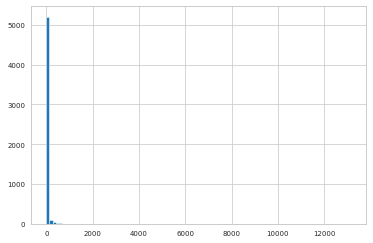

In [19]:
plt.hist(noun_sentence_df_final_reindex_df.AVM_Error_Indicators_scale,bins=100)

In [20]:
noun_sentence_df_final_reindex_df_filtered = noun_sentence_df_final_reindex_df[\
                                                noun_sentence_df_final_reindex_df.AVM_Error_Indicators_scale<20]

In [21]:
noun_sentence_df_final_reindex_df_filtered

,index,AVM_Error_List,Listing_Error_List,Listingid_List,AVM_Error_Indicators_0,AVM_Error_Indicators_1,AVM_Error_Indicators_2,AVM_Error_Indicators_3,AVM_Error_Indicators_4,AVM_Error_Indicators_5,...,Listing_Error_Indicators_6,Listing_Error_Indicators_7,Listing_Error_Indicators_8,Listing_Error_Indicators_9,Listing_Error_Indicators_10,Listing_Error_Indicators_11,AVM_Error_List_count,Listing_Error_List_count,Listingid_List_count,AVM_Error_Indicators_scale
0,new bathrooms,"[0.10878560975609752, 0.0656260194174757, 0.25...","[0.024878048780487806, 0.032362459546925564, -...","[229017180, 229329212, 215966190, 231445008, 1...",0.127106,0.037977,-0.790297,4.407672,-0.088080,0.018085,...,-0.031910,0.000000,0.014048,1523,16.546290,71.240972,1523,1523,1523,1.533190
1,new vanities,"[0.2046909923664122, 0.25085974999999994, 0.31...","[-0.029770992366412213, -0.07416666666666667, ...","[226851936, 227207328, 228059944, 228694545, 2...",0.108594,0.031469,0.212011,0.471803,-0.094723,-0.007932,...,-0.023588,0.000000,0.024392,1300,21.615385,65.307692,1300,1300,1300,1.633581
2,quartz countertops,"[0.07266934782608703, 0.04711003921568624, 0.2...","[0.0, 0.021568627450980392, 0.0, -0.1217073170...","[227301599, 227066289, 227003853, 228078778, 2...",0.102786,0.030028,0.289368,1.145147,-0.078895,-0.007084,...,-0.016746,0.000000,0.024797,8006,23.632276,62.128404,8006,8006,8006,1.685885
3,top bottom,"[-0.17483815668202762, 0.14467078688524593, 0....","[-0.03686635944700461, -0.04885245901639344, -...","[226661263, 227553043, 227207328, 227436501, 2...",0.102521,0.029362,0.108785,0.419584,-0.086264,-0.005496,...,-0.026224,0.000000,0.017868,1218,19.868637,67.569787,1218,1218,1218,1.671402
4,new kitchen cabinets,"[0.3935276169265033, -0.02473273949579835, 0.2...","[0.16481069042316257, -0.008067226890756302, -...","[226027366, 227018382, 228973883, 229099586, 2...",0.063406,0.031471,-0.391246,3.754868,-0.118490,-0.034712,...,-0.025681,0.000000,0.019608,10890,19.651056,66.473829,10890,10890,10890,2.797872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5416,seller requests buyer use seller,"[-1.3322289999999999, 0.16222735849056613, -0....","[-0.25, -0.1320754716981132, 0.042553191489361...","[198263962, 200651017, 209001692, 212786867, 1...",-0.383334,0.141183,-0.955026,0.434778,-0.950258,-0.542584,...,0.006497,0.084132,0.117647,68,51.470588,36.764706,68,68,68,0.980199
5417,great home investors,"[0.2702147777777778, -0.23938986666666673, -0....","[-0.1, -0.19866666666666666, -0.08790322580645...","[197054770, 3232636, 151180267, 130595497, 532...",-0.394972,0.198408,-0.510636,-0.382625,-1.061334,-0.652259,...,-0.067939,0.000000,0.057971,61,19.672131,60.655738,61,61,61,1.127751
5418,needs repairs,"[-0.7064920000000001, -0.2677977391304347, -0....","[-0.047619047619047616, -0.08695652173913043, ...","[230618952, 187242734, 196407010, 139519327, 5...",-0.403244,0.144113,-0.421838,-0.275255,-0.890065,-0.707305,...,-0.079064,0.000000,0.038060,92,20.652174,67.391304,92,92,92,0.941421
5419,seller chooses attorney,"[0.06298180555555555, -0.2739625714285714, -0....","[0.02847222222222222, -0.2571428571428571, -0....","[77911179, 189586243, 180510904, 77958589, 854...",-0.483720,0.156418,0.070260,-0.699504,-1.030980,-0.751404,...,0.000000,0.070632,0.153714,77,44.155844,48.051948,77,77,77,0.817615


In [22]:
noun_sentence_df_final_reindex_df_filtered =  noun_sentence_df_final_reindex_df_filtered.sort_values(['AVM_Error_Indicators_scale','AVM_Error_List_count'],ascending=True)

In [23]:
noun_sentence_df_final_reindex_df_filtered.head(30)

,index,AVM_Error_List,Listing_Error_List,Listingid_List,AVM_Error_Indicators_0,AVM_Error_Indicators_1,AVM_Error_Indicators_2,AVM_Error_Indicators_3,AVM_Error_Indicators_4,AVM_Error_Indicators_5,...,Listing_Error_Indicators_6,Listing_Error_Indicators_7,Listing_Error_Indicators_8,Listing_Error_Indicators_9,Listing_Error_Indicators_10,Listing_Error_Indicators_11,AVM_Error_List_count,Listing_Error_List_count,Listingid_List_count,AVM_Error_Indicators_scale
5419,seller chooses attorney,"[0.06298180555555555, -0.2739625714285714, -0....","[0.02847222222222222, -0.2571428571428571, -0....","[77911179, 189586243, 180510904, 77958589, 854...",-0.483720,0.156418,0.070260,-0.699504,-1.030980,-0.751404,...,0.000000,0.070632,0.153714,77,44.155844,48.051948,77,77,77,0.817615
470,omission and or,"[0.4479667188315075, 0.39755113043478263, -0.0...","[0.0, -0.020217391304347826, -0.00231481481481...","[200890959, 212474411, 216781018, 4238321, 127...",0.138569,0.013917,0.724653,0.433639,-0.004312,0.082017,...,0.000062,0.003073,0.011880,67,52.238806,20.895522,67,67,67,0.851361
456,new hall bath,"[0.15325579310344828, 0.4526205293737895, 0.09...","[0.0, 0.0, -0.246875, -0.014740440076906645, 0...","[200666639, 195667227, 154273819, 146529572, 1...",0.175904,0.023244,0.832372,-0.111166,0.019180,0.073747,...,-0.025000,0.000000,0.000000,65,9.230769,73.846154,65,65,65,0.866730
490,actual plan,"[0.11401168674698792, 0.42815819563780577, -0....","[-0.05176706827309237, 0.008922670191672175, -...","[139507483, 5184741, 78208714, 4238321, 127010...",0.123353,0.012009,0.192376,0.767948,-0.014436,0.082776,...,0.000000,0.003139,0.011573,62,40.322581,30.645161,62,62,62,0.888371
453,tack room,"[0.44872725925925916, 0.4897270173410404, 0.02...","[0.07425925925925926, 0.0, -0.3043478260869565...","[227233008, 233312147, 178762755, 195952044, 2...",0.185357,0.027150,0.028172,-0.132975,-0.020823,0.089613,...,-0.041338,-0.003475,0.005151,126,13.492063,75.396825,126,126,126,0.888953
5420,utilities inspections,"[0.011213698630137103, -0.44224117647058825, 0...","[0.043835616438356165, -0.20452488687782805, -...","[132883912, 4158664, 3640049, 140201011, 13941...",-0.495785,0.207265,-0.040642,-0.613038,-1.092119,-0.759299,...,0.003311,0.120439,0.195436,106,50.000000,40.566038,106,106,106,0.918268
5418,needs repairs,"[-0.7064920000000001, -0.2677977391304347, -0....","[-0.047619047619047616, -0.08695652173913043, ...","[230618952, 187242734, 196407010, 139519327, 5...",-0.403244,0.144113,-0.421838,-0.275255,-0.890065,-0.707305,...,-0.079064,0.000000,0.038060,92,20.652174,67.391304,92,92,92,0.941421
5414,digitdigitdigitdigitdigitdigitdigitdigitdigit,"[-0.307558505850585, -0.24311615384615393, -0....","[0.009900990099009901, -0.028846153846153848, ...","[4236753, 146674048, 6357525, 5506752, 6870212...",-0.370781,0.130337,-0.428574,0.025119,-0.852851,-0.633096,...,-0.093531,0.071804,0.286533,86,33.720930,63.953488,86,86,86,0.973683
5416,seller requests buyer use seller,"[-1.3322289999999999, 0.16222735849056613, -0....","[-0.25, -0.1320754716981132, 0.042553191489361...","[198263962, 200651017, 209001692, 212786867, 1...",-0.383334,0.141183,-0.955026,0.434778,-0.950258,-0.542584,...,0.006497,0.084132,0.117647,68,51.470588,36.764706,68,68,68,0.980199
452,new shaker cabinets,"[0.013355427936272757, 0.25963513157894735, 0....","[0.0, -0.05236842105263158, -0.035059760956175...","[130901823, 1348486, 140931921, 209025177, 140...",0.174239,0.029392,0.198294,-0.338248,-0.020956,0.043381,...,-0.011097,0.000318,0.023492,340,27.058824,55.294118,340,340,340,0.983938


In [24]:
noun_sentence_df_final_reindex_df_filtered = noun_sentence_df_final_reindex_df_filtered.sort_values(['AVM_Error_List_count'],ascending=False)

In [25]:
noun_sentence_df_final_reindex_df_filtered = explode(noun_sentence_df_final_reindex_df_filtered,
                                           lst_cols=['AVM_Error_List','Listing_Error_List','Listingid_List'])

In [26]:
noun_sentence_df_final_reindex_df_filtered

,index,AVM_Error_List,Listing_Error_List,Listingid_List,AVM_Error_Indicators_0,AVM_Error_Indicators_1,AVM_Error_Indicators_2,AVM_Error_Indicators_3,AVM_Error_Indicators_4,AVM_Error_Indicators_5,...,Listing_Error_Indicators_6,Listing_Error_Indicators_7,Listing_Error_Indicators_8,Listing_Error_Indicators_9,Listing_Error_Indicators_10,Listing_Error_Indicators_11,AVM_Error_List_count,Listing_Error_List_count,Listingid_List_count,AVM_Error_Indicators_scale
0,original hardwood floors,0.306433,-0.055556,227777242,0.010333,0.031953,-0.915684,6.180944,-0.166288,-0.071778,...,-0.030207,0.0,0.014852,275630,16.874796,71.645684,275630,275630,275630,17.299161
1,original hardwood floors,0.022058,-0.068837,227795505,0.010333,0.031953,-0.915684,6.180944,-0.166288,-0.071778,...,-0.030207,0.0,0.014852,275630,16.874796,71.645684,275630,275630,275630,17.299161
2,original hardwood floors,0.220630,-0.466000,211013088,0.010333,0.031953,-0.915684,6.180944,-0.166288,-0.071778,...,-0.030207,0.0,0.014852,275630,16.874796,71.645684,275630,275630,275630,17.299161
3,original hardwood floors,-0.374213,-0.291892,210903317,0.010333,0.031953,-0.915684,6.180944,-0.166288,-0.071778,...,-0.030207,0.0,0.014852,275630,16.874796,71.645684,275630,275630,275630,17.299161
4,original hardwood floors,0.297226,-0.017021,229715953,0.010333,0.031953,-0.915684,6.180944,-0.166288,-0.071778,...,-0.030207,0.0,0.014852,275630,16.874796,71.645684,275630,275630,275630,17.299161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328294,distance home,0.143870,-0.037281,222346048,0.023343,0.010922,0.091150,-0.021486,-0.105989,-0.026073,...,-0.022727,0.0,0.038462,51,21.568627,68.627451,51,51,51,4.477058
3328295,distance home,-0.070735,0.015152,157808822,0.023343,0.010922,0.091150,-0.021486,-0.105989,-0.026073,...,-0.022727,0.0,0.038462,51,21.568627,68.627451,51,51,51,4.477058
3328296,distance home,-0.011059,0.019623,85639899,0.023343,0.010922,0.091150,-0.021486,-0.105989,-0.026073,...,-0.022727,0.0,0.038462,51,21.568627,68.627451,51,51,51,4.477058
3328297,distance home,0.059051,0.000000,85577125,0.023343,0.010922,0.091150,-0.021486,-0.105989,-0.026073,...,-0.022727,0.0,0.038462,51,21.568627,68.627451,51,51,51,4.477058


In [27]:
noun_sentence_df_final_reindex_df_filtered.AVM_Error_List.min()

-1.4996102222222225

In [28]:
noun_sentence_df_final_reindex_df_filtered.AVM_Error_List.max()

0.5999625012919896

In [29]:
#columns = ['index', 'AVM_Error_List','Listing_Error_List',
#          'Listingid_List']
#noun_sentence_df_final_reindex_one_by_one_df = pd.DataFrame(columns=columns)

In [30]:
noun_sentence_df_final_reindex_df_filtered = noun_sentence_df_final_reindex_df_filtered.rename(columns={'Listingid_List':'listingid'})

In [31]:
str_state = 'GA'
file = 'agent_comments_sales_'+str_state
#file = 'agent_comments_testdf'
#READ THE SALES DATA - STATE
df_sales = pd.read_feather(file + '_withembeddings.fea')
#df_sales = pd.read_feather(file + '_processed.fea')

In [32]:
df_sales

,listingid,asgpropid,qtr,tax_year,cbsa_div,cbsa,state,Transdate,Transprice,bedrooms,...,clean_publicremarks_stemmed_additional_words_vaderpolarity,clean_publicremarks_lemmatized_vaderpolarity,clean_publicremarks_lemmatized_additional_words_vaderpolarity,sentence_composition,publicremarks_embeddings,clean_publicremarks_embeddings,clean_publicremarks_additional_words_embeddings,clean_publicremarks_nopunct_embeddings,clean_publicremarks_stemmed_embeddings,clean_publicremarks_lemmatized_embeddings
0,226661582,27649366.0,202008,2020.0,23580,23580,GA,20200811,359000.0,4.0,...,"{'compound': 0.4939, 'neg': 0.0, 'neu': 0.954,...","{'compound': 0.9578, 'neg': 0.0, 'neu': 0.786,...","{'compound': 0.93, 'neg': 0.0, 'neu': 0.81, 'p...","[55.00000000000001, 13.750000000000002, 17.5, ...","[-0.018459855, -0.023812085, -0.043892566, -0....","[-0.051987942, -0.054606345, -0.0580922, -0.03...","[-0.05043851, -0.056709077, -0.055227116, -0.0...","[-0.051987942, -0.054606345, -0.0580922, -0.03...","[-0.038664196, -0.05890688, -0.06525755, -0.02...","[-0.04986923, -0.05113033, -0.060150877, -0.03..."
1,226786904,27628370.0,202008,2020.0,29300,29300,GA,20200925,265000.0,4.0,...,"{'compound': 0.9686, 'neg': 0.0, 'neu': 0.799,...","{'compound': 0.9875, 'neg': 0.014, 'neu': 0.70...","{'compound': 0.9844, 'neg': 0.016, 'neu': 0.70...","[60.18518518518518, 13.88888888888889, 18.5185...","[-0.060909368, -0.044562507, -0.048587322, -0....","[-0.06049352, -0.05438737, -0.048537098, -0.05...","[-0.059828583, -0.05020684, -0.046291806, -0.0...","[-0.06049352, -0.05438737, -0.048537098, -0.05...","[-0.065291695, -0.06122866, -0.04930517, 0.006...","[-0.060174935, -0.05459462, -0.045611445, -0.0..."
2,226142320,27963359.0,202005,2020.0,27600,27600,GA,20200624,239900.0,4.0,...,"{'compound': 0.3182, 'neg': 0.0, 'neu': 0.957,...","{'compound': 0.8074, 'neg': 0.0, 'neu': 0.858,...","{'compound': 0.8074, 'neg': 0.0, 'neu': 0.855,...","[60.37735849056604, 9.433962264150944, 24.5283...","[0.051360507, -0.007422204, -0.054501485, -0.0...","[-0.015618877, -0.03321094, -0.064131856, -0.0...","[-0.011177328, -0.034213364, -0.06423391, -0.0...","[-0.015618877, -0.03321094, -0.064131856, -0.0...","[-0.026406875, -0.061117634, -0.071621135, -0....","[-0.026331514, -0.048204094, -0.06567335, -0.0..."
3,226738459,27516267.0,202008,2020.0,29300,29300,GA,20200713,130900.0,3.0,...,"{'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos...","{'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos...","{'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos...","[53.84615384615385, 7.6923076923076925, 38.461...","[-0.020899976, 0.016856506, -0.011256389, -0.0...","[-0.028272344, -0.005281781, -0.0073222406, -0...","[0.0036934454, 0.047616564, -0.0056924997, 0.0...","[-0.028272344, -0.005281781, -0.0073222406, -0...","[-0.050069433, 0.007041185, -0.033259477, -0.0...","[-0.028272344, -0.005281781, -0.0073222406, -0..."
4,226850183,27791872.0,202008,2020.0,23580,23580,GA,20200702,406000.0,4.0,...,"{'compound': 0.2023, 'neg': 0.0, 'neu': 0.969,...","{'compound': 0.802, 'neg': 0.0, 'neu': 0.876, ...","{'compound': 0.6908, 'neg': 0.0, 'neu': 0.908,...","[65.57377049180327, 13.114754098360656, 11.475...","[-0.047313046, 0.00859506, -0.04837404, -0.052...","[-0.055047132, -0.031499583, -0.055006824, -0....","[-0.053909175, -0.025725972, -0.05363282, -0.0...","[-0.055047132, -0.031499583, -0.055006824, -0....","[-0.061100535, -0.05123385, -0.067388244, -0.0...","[-0.054386344, -0.04275706, -0.052802, -0.0314..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
633866,77898274,106321613.0,200708,2013.0,27600,27600,GA,20070719,163900.0,NaN,...,"{'compound': 0.5574, 'neg': 0.0, 'neu': 0.839,...","{'compound': 0.5574, 'neg': 0.0, 'neu': 0.85, ...","{'compound': 0.5574, 'neg': 0.0, 'neu': 0.839,...","[57.14285714285714, 17.857142857142858, 14.285...","[-0.051895734, -0.034251053, 0.033765092, -0.0...","[-0.060446255, -0.039059404, -0.010817213, 0.0...","[-0.05962046, -0.036440928,

In [33]:
df_sales.columns

Index(['listingid', 'asgpropid', 'qtr', 'tax_year', 'cbsa_div', 'cbsa',
       'state', 'Transdate', 'Transprice', 'bedrooms', 'total_value',
       'cj_living_area', 'basement', 'has_pool', 'parking', 'is_poor',
       'is_good', 'HAS_VIEW', 'has_golf', 'has_water', 'has_woods', 'has_hill',
       'fips_code', 'census_tract', 'zip', 'effective_year_built', 'story',
       'ListingPrice', 'publicremarks', 'avmValue', 'avmerror', 'rentsale',
       'publicremarks_prepared', 'publicremarks_prepared_unicode',
       'clean_publicremarks', 'clean_publicremarks_additional_words',
       'clean_publicremarks_nopunct',
       'clean_publicremarks_nopunct_additional_words',
       'clean_publicremarks_stemmed',
       'clean_publicremarks_stemmed_additional_words',
       'clean_publicremarks_lemmatized',
       'clean_publicremarks_lemmatized_additional_words',
       'publicremarks_nltkpolarity', 'clean_publicremarks_nltkpolarity',
       'clean_publicremarks_additional_words_nltkpolarity',


In [34]:
noun_sentence_df_final_joined_df = noun_sentence_df_final_reindex_df_filtered.merge(df_sales, \
                                               left_on='listingid', right_on='listingid', how='left', 
                                               suffixes=('_left', '_right'))

In [35]:
noun_sentence_df_final_joined_df['avmerror']

0          0.306433
1          0.022058
2          0.220630
3         -0.374213
4          0.297226
             ...   
3328884    0.143870
3328885   -0.070735
3328886   -0.011059
3328887    0.059051
3328888   -0.005385
Name: avmerror, Length: 3328889, dtype: float64

In [36]:
noun_sentence_df_final_joined_df

,index,AVM_Error_List,Listing_Error_List,listingid,AVM_Error_Indicators_0,AVM_Error_Indicators_1,AVM_Error_Indicators_2,AVM_Error_Indicators_3,AVM_Error_Indicators_4,AVM_Error_Indicators_5,...,clean_publicremarks_stemmed_additional_words_vaderpolarity,clean_publicremarks_lemmatized_vaderpolarity,clean_publicremarks_lemmatized_additional_words_vaderpolarity,sentence_composition,publicremarks_embeddings,clean_publicremarks_embeddings,clean_publicremarks_additional_words_embeddings,clean_publicremarks_nopunct_embeddings,clean_publicremarks_stemmed_embeddings,clean_publicremarks_lemmatized_embeddings
0,original hardwood floors,0.306433,-0.055556,227777242,0.010333,0.031953,-0.915684,6.180944,-0.166288,-0.071778,...,"{'compound': 0.969, 'neg': 0.0, 'neu': 0.674, ...","{'compound': 0.9756, 'neg': 0.0, 'neu': 0.678,...","{'compound': 0.9756, 'neg': 0.0, 'neu': 0.641,...","[52.459016393442624, 11.475409836065573, 29.50...","[-0.010265199, -0.03327128, -0.05217451, -0.02...","[-0.04392417, -0.047896847, -0.067947134, -0.0...","[-0.03518955, -0.05148071, -0.06814068, -0.027...","[-0.04392417, -0.047896847, -0.067947134, -0.0...","[-0.06272567, -0.063212566, -0.07018015, 0.014...","[-0.050022796, -0.046320625, -0.06797541, -0.0..."
1,original hardwood floors,0.022058,-0.068837,227795505,0.010333,0.031953,-0.915684,6.180944,-0.166288,-0.071778,...,"{'compound': 0.4019, 'neg': 0.0, 'neu': 0.934,...","{'compound': 0.8689, 'neg': 0.0, 'neu': 0.779,...","{'compound': 0.8689, 'neg': 0.0, 'neu': 0.764,...","[66.66666666666666, 9.523809523809524, 23.8095...","[-0.031944185, -0.04495096, -0.030535603, -0.0...","[-0.058957294, -0.057983015, -0.050311685, -0....","[-0.05545946, -0.059333913, -0.04678816, 0.004...","[-0.058957294, -0.057983015, -0.050311685, -0....","[-0.046731114, -0.05224844, -0.061328948, 0.01...","[-0.060846403, -0.054011997, -0.057865903, -0...."
2,original hardwood floors,0.220630,-0.466000,211013088,0.010333,0.031953,-0.915684,6.180944,-0.166288,-0.071778,...,"{'compound': 0.5106, 'neg': 0.0, 'neu': 0.959,...","{'compound': 0.9001, 'neg': 0.0, 'neu': 0.854,...","{'compound': 0.9001, 'neg': 0.0, 'neu': 0.849,...","[65.4320987654321, 11.11111111111111, 22.22222...","[-0.04563809, -0.05961127, -0.039439198, -0.06...","[-0.057921063, -0.065156125, -0.062468007, 0.0...","[-0.054688357, -0.0654058, -0.062155664, 0.014...","[-0.057921063, -0.065156125, -0.062468007, 0.0...","[-0.046859957, -0.06643747, -0.065655164, 0.02...","[-0.053770937, -0.06545674, -0.064671054, 0.01..."
3,original hardwood floors,-0.374213,-0.291892,210903317,0.010333,0.031953,-0.915684,6.180944,-0.166288,-0.071778,...,"{'compound': 0.6705, 'neg': 0.038, 'neu': 0.84...","{'compound': 0.9062, 'neg': 0.028, 'neu': 0.76...","{'compound': 0.9062, 'neg': 0.029, 'neu': 0.75...","[55.38461538461539, 10.76923076923077, 27.6923...","[-0.0356191, -0.028516768, -0.04432314, -0.064...","[-0.055430647, -0.05161296, -0.052718233, -0.0...","[-0.05291823, -0.055096425, -0.05102843, -0.06...","[-0.05604647, -0.049319115, -0.054434184, -0.0...","[-0.05711868, -0.05091322, -0.062050395, -0.06...","[-0.056385245, -0.046685252, -0.059374038, -0...."
4,original hardwood floors,0.297226,-0.017021,229715953,0.010333,0.031953,-0.915684,6.180944,-0.166288,-0.071778,...,"{'compound': 0.7579, 'neg': 0.0, 'neu': 0.921,...","{'compound': 0.9652, 'neg': 0.02, 'neu': 0.752...","{'compound': 0.9538, 'neg': 0.021, 'neu': 0.77...","[58.0246913580247, 11.11111111111111, 27.16049...","[-0.05718145, -0.050718177, -0.058041595, -0.0...","[-0.058812484, -0.059724327, -0.05643848, -0.0...","[-0.05833476, -0.05996593, -0.05600546, -0.042...","[-0.058812484, -0.059724327, -0.05643848, -0.0...","[-0.06183289, -0.06053417, -0.044263687, -0.00...","[-0.05759185, -0.05672625, -0.056117173, -0.03..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328884,distance home,0.143870,-0.037281,222346048,0.023343,0.010922,0.091150,-0.021486,-0.105989,-0.026073,...,"{'compoun

In [ ]:
noun_sentence_df_final_joined_df.to_feather('noun_sentence_df_final_joined_df_2.fea')

In [37]:
noun_sentence_df_final_joined_df.columns

Index(['index', 'AVM_Error_List', 'Listing_Error_List', 'listingid',
       'AVM_Error_Indicators_0', 'AVM_Error_Indicators_1',
       'AVM_Error_Indicators_2', 'AVM_Error_Indicators_3',
       'AVM_Error_Indicators_4', 'AVM_Error_Indicators_5',
       ...
       'clean_publicremarks_stemmed_additional_words_vaderpolarity',
       'clean_publicremarks_lemmatized_vaderpolarity',
       'clean_publicremarks_lemmatized_additional_words_vaderpolarity',
       'sentence_composition', 'publicremarks_embeddings',
       'clean_publicremarks_embeddings',
       'clean_publicremarks_additional_words_embeddings',
       'clean_publicremarks_nopunct_embeddings',
       'clean_publicremarks_stemmed_embeddings',
       'clean_publicremarks_lemmatized_embeddings'],
      dtype='object', length=619)

In [38]:
noun_sentence_df_final_joined_df = noun_sentence_df_final_joined_df.set_index('listingid')

In [39]:
noun_sentence_df_final_joined_df.columns

Index(['index', 'AVM_Error_List', 'Listing_Error_List',
       'AVM_Error_Indicators_0', 'AVM_Error_Indicators_1',
       'AVM_Error_Indicators_2', 'AVM_Error_Indicators_3',
       'AVM_Error_Indicators_4', 'AVM_Error_Indicators_5',
       'AVM_Error_Indicators_6',
       ...
       'clean_publicremarks_stemmed_additional_words_vaderpolarity',
       'clean_publicremarks_lemmatized_vaderpolarity',
       'clean_publicremarks_lemmatized_additional_words_vaderpolarity',
       'sentence_composition', 'publicremarks_embeddings',
       'clean_publicremarks_embeddings',
       'clean_publicremarks_additional_words_embeddings',
       'clean_publicremarks_nopunct_embeddings',
       'clean_publicremarks_stemmed_embeddings',
       'clean_publicremarks_lemmatized_embeddings'],
      dtype='object', length=618)

In [40]:
important_columns = ['index', 'AVM_Error_List', 'Listing_Error_List',
                     'Transdate', 'Transprice','total_value', 'cj_living_area',
                     'effective_year_built', 'story', 'ListingPrice','avmValue', 'avmerror',
                     'clean_publicremarks_additional_words_vaderpolarity','sentence_composition','bedrooms']

In [41]:
columns_selected = noun_sentence_df_final_joined_df.columns[\
                                pd.Series(noun_sentence_df_final_joined_df.columns).str.startswith('AVM_Error_Indicators')]
important_columns = important_columns + list(columns_selected)

columns_selected = noun_sentence_df_final_joined_df.columns[\
                                pd.Series(noun_sentence_df_final_joined_df.columns).str.startswith('Listing_Error_Indicators')]
important_columns = important_columns + list(columns_selected)

#columns_selected = noun_sentence_df_final_joined_df.columns[\
#                                pd.Series(noun_sentence_df_final_joined_df.columns).str.startswith('noun_sentence_corrections_embeddings')]
#important_columns = important_columns + list(columns_selected)


In [42]:
important_columns

['index',
 'AVM_Error_List',
 'Listing_Error_List',
 'Transdate',
 'Transprice',
 'total_value',
 'cj_living_area',
 'effective_year_built',
 'story',
 'ListingPrice',
 'avmValue',
 'avmerror',
 'clean_publicremarks_additional_words_vaderpolarity',
 'sentence_composition',
 'bedrooms',
 'AVM_Error_Indicators_0',
 'AVM_Error_Indicators_1',
 'AVM_Error_Indicators_2',
 'AVM_Error_Indicators_3',
 'AVM_Error_Indicators_4',
 'AVM_Error_Indicators_5',
 'AVM_Error_Indicators_6',
 'AVM_Error_Indicators_7',
 'AVM_Error_Indicators_8',
 'AVM_Error_Indicators_9',
 'AVM_Error_Indicators_10',
 'AVM_Error_Indicators_11',
 'AVM_Error_Indicators_scale',
 'Listing_Error_Indicators_0',
 'Listing_Error_Indicators_1',
 'Listing_Error_Indicators_2',
 'Listing_Error_Indicators_3',
 'Listing_Error_Indicators_4',
 'Listing_Error_Indicators_5',
 'Listing_Error_Indicators_6',
 'Listing_Error_Indicators_7',
 'Listing_Error_Indicators_8',
 'Listing_Error_Indicators_9',
 'Listing_Error_Indicators_10',
 'Listing_Erro

In [43]:
noun_sentence_df_final_joined_df[important_columns]

,index,AVM_Error_List,Listing_Error_List,Transdate,Transprice,total_value,cj_living_area,effective_year_built,story,ListingPrice,...,Listing_Error_Indicators_2,Listing_Error_Indicators_3,Listing_Error_Indicators_4,Listing_Error_Indicators_5,Listing_Error_Indicators_6,Listing_Error_Indicators_7,Listing_Error_Indicators_8,Listing_Error_Indicators_9,Listing_Error_Indicators_10,Listing_Error_Indicators_11
listingid,,,,,,,,,,,,,,,,,,,,,
227777242,original hardwood floors,0.306433,-0.055556,20200902,180000.0,50310.0,1064.0,1973.0,1.0,190000.0,...,-3.893493,34.885132,-0.135606,-0.072368,-0.030207,0.0,0.014852,275630,16.874796,71.645684
227795505,original hardwood floors,0.022058,-0.068837,20200803,107500.0,89431.0,1312.0,1933.0,1.0,114900.0,...,-3.893493,34.885132,-0.135606,-0.072368,-0.030207,0.0,0.014852,275630,16.874796,71.645684
211013088,original hardwood floors,0.220630,-0.466000,20200214,150000.0,148280.0,1670.0,2011.0,1.0,219900.0,...,-3.893493,34.885132,-0.135606,-0.072368,-0.030207,0.0,0.014852,275630,16.874796,71.645684
210903317,original hardwood floors,-0.374213,-0.291892,20200410,185000.0,179300.0,1620.0,1990.0,1.0,239000.0,...,-3.893493,34.885132,-0.135606,-0.072368,-0.030207,0.0,0.014852,275630,16.874796,71.645684
229715953,original hardwood floors,0.297226,-0.017021,20201008,235000.0,145778.0,1704.0,1951.0,1.0,239000.0,...,-3.893493,34.885132,-0.135606,-0.072368,-0.030207,0.0,0.014852,275630,16.874796,71.645684
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222346048,distance home,0.143870,-0.037281,20200521,228000.0,189309.0,2281.0,2006.0,1.0,236500.0,...,-3.057285,14.106729,-0.113636,-0.054051,-0.022727,0.0,0.038462,51,21.568627,68.627451
157808822,distance home,-0.070735,0.015152,20180710,198000.0,30000.0,2340.0,2017.0,2.0,195000.0,...,-3.057285,14.106729,-0.113636,-0.054051,-0.022727,0.0,0.038462,51,21.568627,68.627451
85639899,distance home,-0.011059,0.019623,20170505,132500.0,106400.0,1283.0,2002.0,2.0,129900.0,...,-3.057285,14.106729,-0.113636,-0.054051,-0.022727,0.0,0.038462,51,21.568627,68.627451


In [44]:
noun_sentence_df_final_joined_df.avmerror

listingid
227777242    0.306433
227795505    0.022058
211013088    0.220630
210903317   -0.374213
229715953    0.297226
               ...   
222346048    0.143870
157808822   -0.070735
85639899    -0.011059
85577125     0.059051
78013900    -0.005385
Name: avmerror, Length: 3328889, dtype: float64

In [45]:
noun_sentence_df_final_joined_df_selected_columns = noun_sentence_df_final_joined_df.loc[:,important_columns]

In [46]:
noun_sentence_df_final_joined_df_selected_columns

,index,AVM_Error_List,Listing_Error_List,Transdate,Transprice,total_value,cj_living_area,effective_year_built,story,ListingPrice,...,Listing_Error_Indicators_2,Listing_Error_Indicators_3,Listing_Error_Indicators_4,Listing_Error_Indicators_5,Listing_Error_Indicators_6,Listing_Error_Indicators_7,Listing_Error_Indicators_8,Listing_Error_Indicators_9,Listing_Error_Indicators_10,Listing_Error_Indicators_11
listingid,,,,,,,,,,,,,,,,,,,,,
227777242,original hardwood floors,0.306433,-0.055556,20200902,180000.0,50310.0,1064.0,1973.0,1.0,190000.0,...,-3.893493,34.885132,-0.135606,-0.072368,-0.030207,0.0,0.014852,275630,16.874796,71.645684
227795505,original hardwood floors,0.022058,-0.068837,20200803,107500.0,89431.0,1312.0,1933.0,1.0,114900.0,...,-3.893493,34.885132,-0.135606,-0.072368,-0.030207,0.0,0.014852,275630,16.874796,71.645684
211013088,original hardwood floors,0.220630,-0.466000,20200214,150000.0,148280.0,1670.0,2011.0,1.0,219900.0,...,-3.893493,34.885132,-0.135606,-0.072368,-0.030207,0.0,0.014852,275630,16.874796,71.645684
210903317,original hardwood floors,-0.374213,-0.291892,20200410,185000.0,179300.0,1620.0,1990.0,1.0,239000.0,...,-3.893493,34.885132,-0.135606,-0.072368,-0.030207,0.0,0.014852,275630,16.874796,71.645684
229715953,original hardwood floors,0.297226,-0.017021,20201008,235000.0,145778.0,1704.0,1951.0,1.0,239000.0,...,-3.893493,34.885132,-0.135606,-0.072368,-0.030207,0.0,0.014852,275630,16.874796,71.645684
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222346048,distance home,0.143870,-0.037281,20200521,228000.0,189309.0,2281.0,2006.0,1.0,236500.0,...,-3.057285,14.106729,-0.113636,-0.054051,-0.022727,0.0,0.038462,51,21.568627,68.627451
157808822,distance home,-0.070735,0.015152,20180710,198000.0,30000.0,2340.0,2017.0,2.0,195000.0,...,-3.057285,14.106729,-0.113636,-0.054051,-0.022727,0.0,0.038462,51,21.568627,68.627451
85639899,distance home,-0.011059,0.019623,20170505,132500.0,106400.0,1283.0,2002.0,2.0,129900.0,...,-3.057285,14.106729,-0.113636,-0.054051,-0.022727,0.0,0.038462,51,21.568627,68.627451


In [47]:
columns_to_list = ['clean_publicremarks_additional_words_vaderpolarity']


In [48]:
for column in columns_to_list:
    print(column)
    noun_sentence_df_final_joined_df_selected_columns[column] =noun_sentence_df_final_joined_df_selected_columns[column].apply(lambda x: list(x.values()))

clean_publicremarks_additional_words_vaderpolarity


In [49]:
columns_to_split = [ 'clean_publicremarks_additional_words_vaderpolarity','sentence_composition']

In [50]:
noun_sentence_df_final_joined_df_selected_columns_use = noun_sentence_df_final_joined_df_selected_columns

for column in columns_to_split:
    nelements = (len(noun_sentence_df_final_joined_df_selected_columns_use[column].values[0]))
    list_tmp = [str(i) for i in range(nelements)] 
    column_names = [column + '_' + str(i) for i in list_tmp] 
    print(column_names)
    split_df = pd.DataFrame(noun_sentence_df_final_joined_df_selected_columns_use[column].tolist(), columns=column_names, 
                            index=noun_sentence_df_final_joined_df_selected_columns_use.index)
    noun_sentence_df_final_joined_df_selected_columns_use = pd.concat([noun_sentence_df_final_joined_df_selected_columns_use, split_df], axis=1)
    noun_sentence_df_final_joined_df_selected_columns_use = noun_sentence_df_final_joined_df_selected_columns_use.drop(columns = [column])

['clean_publicremarks_additional_words_vaderpolarity_0', 'clean_publicremarks_additional_words_vaderpolarity_1', 'clean_publicremarks_additional_words_vaderpolarity_2', 'clean_publicremarks_additional_words_vaderpolarity_3']
['sentence_composition_0', 'sentence_composition_1', 'sentence_composition_2', 'sentence_composition_3', 'sentence_composition_4', 'sentence_composition_5', 'sentence_composition_6', 'sentence_composition_7', 'sentence_composition_8']


In [51]:
noun_sentence_df_final_joined_df_selected_columns_use

,index,AVM_Error_List,Listing_Error_List,Transdate,Transprice,total_value,cj_living_area,effective_year_built,story,ListingPrice,...,clean_publicremarks_additional_words_vaderpolarity_3,sentence_composition_0,sentence_composition_1,sentence_composition_2,sentence_composition_3,sentence_composition_4,sentence_composition_5,sentence_composition_6,sentence_composition_7,sentence_composition_8
listingid,,,,,,,,,,,,,,,,,,,,,
227777242,original hardwood floors,0.306433,-0.055556,20200902,180000.0,50310.0,1064.0,1973.0,1.0,190000.0,...,0.359,52.459016,11.475410,29.508197,6.557377,0.000000,0.000000,0.000000,61.0,14.0
227795505,original hardwood floors,0.022058,-0.068837,20200803,107500.0,89431.0,1312.0,1933.0,1.0,114900.0,...,0.241,66.666667,9.523810,23.809524,0.000000,0.000000,0.000000,0.000000,42.0,11.0
211013088,original hardwood floors,0.220630,-0.466000,20200214,150000.0,148280.0,1670.0,2011.0,1.0,219900.0,...,0.149,65.432099,11.111111,22.222222,1.234568,0.000000,0.000000,0.000000,81.0,19.0
210903317,original hardwood floors,-0.374213,-0.291892,20200410,185000.0,179300.0,1620.0,1990.0,1.0,239000.0,...,0.216,55.384615,10.769231,27.692308,3.076923,1.538462,0.000000,1.538462,65.0,19.0
229715953,original hardwood floors,0.297226,-0.017021,20201008,235000.0,145778.0,1704.0,1951.0,1.0,239000.0,...,0.211,58.024691,11.111111,27.160494,2.469136,0.000000,0.000000,0.000000,81.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222346048,distance home,0.143870,-0.037281,20200521,228000.0,189309.0,2281.0,2006.0,1.0,236500.0,...,0.156,66.363636,11.818182,15.454545,5.454545,0.909091,0.000000,0.000000,110.0,23.0
157808822,distance home,-0.070735,0.015152,20180710,198000.0,30000.0,2340.0,2017.0,2.0,195000.0,...,0.247,53.846154,10.769231,32.307692,3.076923,0.000000,0.000000,0.000000,65.0,17.0
85639899,distance home,-0.011059,0.019623,20170505,132500.0,106400.0,1283.0,2002.0,2.0,129900.0,...,0.180,48.571429,17.142857,28.571429,2.857143,2.857143,0.000000,0.000000,35.0,9.0


In [52]:
noun_sentence_df_final_joined_df_selected_columns_use.reset_index().to_feather('noun_sentence_df_final_joined_df_selected_columns_use_2.fea')

In [53]:
noun_sentence_df_final_joined_df_selected_columns_use

,index,AVM_Error_List,Listing_Error_List,Transdate,Transprice,total_value,cj_living_area,effective_year_built,story,ListingPrice,...,clean_publicremarks_additional_words_vaderpolarity_3,sentence_composition_0,sentence_composition_1,sentence_composition_2,sentence_composition_3,sentence_composition_4,sentence_composition_5,sentence_composition_6,sentence_composition_7,sentence_composition_8
listingid,,,,,,,,,,,,,,,,,,,,,
227777242,original hardwood floors,0.306433,-0.055556,20200902,180000.0,50310.0,1064.0,1973.0,1.0,190000.0,...,0.359,52.459016,11.475410,29.508197,6.557377,0.000000,0.000000,0.000000,61.0,14.0
227795505,original hardwood floors,0.022058,-0.068837,20200803,107500.0,89431.0,1312.0,1933.0,1.0,114900.0,...,0.241,66.666667,9.523810,23.809524,0.000000,0.000000,0.000000,0.000000,42.0,11.0
211013088,original hardwood floors,0.220630,-0.466000,20200214,150000.0,148280.0,1670.0,2011.0,1.0,219900.0,...,0.149,65.432099,11.111111,22.222222,1.234568,0.000000,0.000000,0.000000,81.0,19.0
210903317,original hardwood floors,-0.374213,-0.291892,20200410,185000.0,179300.0,1620.0,1990.0,1.0,239000.0,...,0.216,55.384615,10.769231,27.692308,3.076923,1.538462,0.000000,1.538462,65.0,19.0
229715953,original hardwood floors,0.297226,-0.017021,20201008,235000.0,145778.0,1704.0,1951.0,1.0,239000.0,...,0.211,58.024691,11.111111,27.160494,2.469136,0.000000,0.000000,0.000000,81.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222346048,distance home,0.143870,-0.037281,20200521,228000.0,189309.0,2281.0,2006.0,1.0,236500.0,...,0.156,66.363636,11.818182,15.454545,5.454545,0.909091,0.000000,0.000000,110.0,23.0
157808822,distance home,-0.070735,0.015152,20180710,198000.0,30000.0,2340.0,2017.0,2.0,195000.0,...,0.247,53.846154,10.769231,32.307692,3.076923,0.000000,0.000000,0.000000,65.0,17.0
85639899,distance home,-0.011059,0.019623,20170505,132500.0,106400.0,1283.0,2002.0,2.0,129900.0,...,0.180,48.571429,17.142857,28.571429,2.857143,2.857143,0.000000,0.000000,35.0,9.0


In [54]:
listingid_array = df_sales['listingid'].values

In [55]:
listingid_array

array([226661582, 226786904, 226142320, ...,  77900119,  77861631,
        77883696])

In [56]:
noun_sentence_df_final_joined_df_selected_columns.loc[listingid_array[1]]

,index,AVM_Error_List,Listing_Error_List,Transdate,Transprice,total_value,cj_living_area,effective_year_built,story,ListingPrice,...,Listing_Error_Indicators_2,Listing_Error_Indicators_3,Listing_Error_Indicators_4,Listing_Error_Indicators_5,Listing_Error_Indicators_6,Listing_Error_Indicators_7,Listing_Error_Indicators_8,Listing_Error_Indicators_9,Listing_Error_Indicators_10,Listing_Error_Indicators_11
listingid,,,,,,,,,,,,,,,,,,,,,
226786904,master bath,0.076122,-0.056226,20200925,265000.0,188200.0,2927.0,1995.0,1.0,279900.0,...,-3.453806,41.257595,-0.103878,-0.057601,-0.022727,0.000000,0.017055,24203,19.534768,67.177623
226786904,gorgeous hardwoods,0.076122,-0.056226,20200925,265000.0,188200.0,2927.0,1995.0,1.0,279900.0,...,-4.806537,52.860852,-0.119681,-0.064910,-0.025953,0.000000,0.017230,7404,18.111831,68.503512
226786904,glass door,0.076122,-0.056226,20200925,265000.0,188200.0,2927.0,1995.0,1.0,279900.0,...,-2.719634,16.790941,-0.135947,-0.071071,-0.027650,0.000000,0.018673,1855,18.652291,68.571429
226786904,stone counters,0.076122,-0.056226,20200925,265000.0,188200.0,2927.0,1995.0,1.0,279900.0,...,-5.261553,55.966768,-0.106317,-0.056447,-0.022305,0.000000,0.021286,1535,20.977199,65.993485
226786904,new vanity,0.076122,-0.056226,20200925,265000.0,188200.0,2927.0,1995.0,1.0,279900.0,...,-2.170542,23.184439,-0.099500,-0.054054,-0.013720,0.000000,0.028143,881,24.631101,58.910329
226786904,new cabinetry,0.076122,-0.056226,20200925,265000.0,188200.0,2927.0,1995.0,1.0,279900.0,...,-1.840948,5.513893,-0.118525,-0.060000,-0.023902,0.000000,0.019228,693,20.490620,65.223665
226786904,location location location,0.076122,-0.056226,20200925,265000.0,188200.0,2927.0,1995.0,1.0,279900.0,...,-3.648605,28.435884,-0.140767,-0.073722,-0.029412,0.000000,0.018954,444,18.468468,68.018018
226786904,historic home,0.076122,-0.056226,20200925,265000.0,188200.0,2927.0,1995.0,1.0,279900.0,...,-3.517390,18.891459,-0.236707,-0.121121,-0.052368,-0.008418,0.013899,313,12.779553,77.316294
226786904,favorite book,0.076122,-0.056226,20200925,265000.0,188200.0,2927.0,1995.0,1.0,279900.0,...,-1.659069,3.343602,-0.087172,-0.047106,-0.013572,0.000341,0.023173,70,25.714286,61.428571


In [57]:
noun_sentence_df_final_joined_df_selected_columns_use = noun_sentence_df_final_joined_df_selected_columns_use.reset_index()

In [58]:
noun_sentence_df_final_joined_df_selected_columns_use

,listingid,index,AVM_Error_List,Listing_Error_List,Transdate,Transprice,total_value,cj_living_area,effective_year_built,story,...,clean_publicremarks_additional_words_vaderpolarity_3,sentence_composition_0,sentence_composition_1,sentence_composition_2,sentence_composition_3,sentence_composition_4,sentence_composition_5,sentence_composition_6,sentence_composition_7,sentence_composition_8
0,227777242,original hardwood floors,0.306433,-0.055556,20200902,180000.0,50310.0,1064.0,1973.0,1.0,...,0.359,52.459016,11.475410,29.508197,6.557377,0.000000,0.000000,0.000000,61.0,14.0
1,227795505,original hardwood floors,0.022058,-0.068837,20200803,107500.0,89431.0,1312.0,1933.0,1.0,...,0.241,66.666667,9.523810,23.809524,0.000000,0.000000,0.000000,0.000000,42.0,11.0
2,211013088,original hardwood floors,0.220630,-0.466000,20200214,150000.0,148280.0,1670.0,2011.0,1.0,...,0.149,65.432099,11.111111,22.222222,1.234568,0.000000,0.000000,0.000000,81.0,19.0
3,210903317,original hardwood floors,-0.374213,-0.291892,20200410,185000.0,179300.0,1620.0,1990.0,1.0,...,0.216,55.384615,10.769231,27.692308,3.076923,1.538462,0.000000,1.538462,65.0,19.0
4,229715953,original hardwood floors,0.297226,-0.017021,20201008,235000.0,145778.0,1704.0,1951.0,1.0,...,0.211,58.024691,11.111111,27.160494,2.469136,0.000000,0.000000,0.000000,81.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328884,222346048,distance home,0.143870,-0.037281,20200521,228000.0,189309.0,2281.0,2006.0,1.0,...,0.156,66.363636,11.818182,15.454545,5.454545,0.909091,0.000000,0.000000,110.0,23.0
3328885,157808822,distance home,-0.070735,0.015152,20180710,198000.0,30000.0,2340.0,2017.0,2.0,...,0.247,53.846154,10.769231,32.307692,3.076923,0.000000,0.000000,0.000000,65.0,17.0
3328886,85639899,distance home,-0.011059,0.019623,20170505,132500.0,106400.0,1283.0,2002.0,2.0,...,0.180,48.571429,17.142857,28.571429,2.857143,2.857143,0.000000,0.000000,35.0,9.0
3328887,85577125,distance home,0.059051,0.000000,20161208,229000.0,195200.0,2182.0,1998.0,2.0,...,0.200,67.901235,8.641975,16.049383,3.703704,2.469136,0.000000,0.000000,81.0,22.0


In [59]:
noun_sentence_df_final_joined_df_selected_columns_use['transaction_year'] = np.floor(np.array((noun_sentence_df_final_joined_df_selected_columns_use['Transdate'].values/10000)))

In [60]:
noun_sentence_df_final_joined_df_selected_columns_use_max =  noun_sentence_df_final_joined_df_selected_columns_use.loc\
            [noun_sentence_df_final_joined_df_selected_columns_use.groupby('listingid').AVM_Error_Indicators_scale.idxmax()]

In [61]:
noun_sentence_df_final_joined_df_selected_columns_use_min_pos = noun_sentence_df_final_joined_df_selected_columns_use.groupby('listingid').AVM_Error_Indicators_scale.idxmin()

In [62]:
noun_sentence_df_final_joined_df_selected_columns_use_min_pos

listingid
1066         2663231
1071         1418678
1079         1408417
1080         2913823
1084         3313278
              ...   
251262429    3091005
251293307    2722149
251315118    2999884
251452095    2593728
251471319    3291465
Name: AVM_Error_Indicators_scale, Length: 599876, dtype: int64

In [63]:
noun_sentence_df_final_joined_df_selected_columns_use_min =  noun_sentence_df_final_joined_df_selected_columns_use.loc\
            [noun_sentence_df_final_joined_df_selected_columns_use_min_pos]

In [72]:
noun_sentence_df_final_joined_df_selected_columns_use_min

,listingid,index,AVM_Error_List,Listing_Error_List,Transdate,Transprice,total_value,cj_living_area,effective_year_built,story,...,sentence_composition_0,sentence_composition_1,sentence_composition_2,sentence_composition_3,sentence_composition_4,sentence_composition_5,sentence_composition_6,sentence_composition_7,sentence_composition_8,transaction_year
2663231,1066,central heat,0.095595,-0.066000,20180111,150000.0,98615.0,925.0,2005.0,1.0,...,58.620690,17.241379,13.793103,6.896552,1.724138,1.724138,0.0,58.0,15.0,2018.0
1418678,1071,new appliances,-0.038420,-0.018605,20171208,215000.0,143200.0,1730.0,1995.0,2.0,...,57.812500,17.187500,18.750000,1.562500,3.125000,0.000000,0.0,64.0,13.0,2017.0
1408417,1079,new kitchen cabinets,-0.067666,-0.075000,20180116,240000.0,184190.0,2640.0,2000.0,2.0,...,57.894737,15.789474,24.561404,1.754386,0.000000,0.000000,0.0,57.0,16.0,2018.0
2913823,1080,modern updates,0.085874,0.000000,20171227,389900.0,324300.0,3092.0,1997.0,2.0,...,52.941176,10.294118,30.882353,4.411765,0.000000,0.000000,0.0,68.0,18.0,2017.0
3313278,1084,pool pump,-0.152460,0.000000,20180201,214900.0,201300.0,2600.0,1997.0,1.0,...,58.666667,10.666667,29.333333,4.000000,0.000000,0.000000,0.0,75.0,21.0,2018.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3091005,251262429,great rental property,-0.359648,0.132275,20210630,94500.0,52978.0,1236.0,2000.0,1.0,...,68.852459,6.557377,22.950820,1.639344,0.000000,0.000000,0.0,61.0,18.0,2021.0
2722149,251293307,estate sale,0.133998,-0.019417,20210621,206000.0,135728.0,2288.0,1968.0,1.0,...,42.105263,26.315789,15.789474,5.263158,0.000000,0.000000,0.0,19.0,3.0,2021.0
2999884,251315118,yard paradise,0.227947,0.000000,20210621,575000.0,362166.0,4144.0,1978.0,2.0,...,54.545455,19.191919,17.171717,5.050505,3.030303,0.000000,0.0,99.0,21.0,2021.0
2593728,251452095,perkerson park,-0.011109,0.064987,20210624,560420.0,436500.0,1854.0,2004.0,1.5,...,56.000000,16.000000,16.000000,8.000000,4.000000,0.000000,0.0,50.0,12.0,2021.0


In [73]:
noun_sentence_df_final_joined_df_selected_columns_use_min.reset_index().\
    to_feather('noun_sentence_df_final_joined_df_selected_columns_use_min_01.fea')

In [64]:
noun_sentence_df_final_joined_df_selected_columns_use_dropped_rows = \
                    noun_sentence_df_final_joined_df_selected_columns_use.drop(\
                                    noun_sentence_df_final_joined_df_selected_columns_use_min_pos)

In [65]:
noun_sentence_df_final_joined_df_selected_columns_use_min_pos_2 = noun_sentence_df_final_joined_df_selected_columns_use_dropped_rows.groupby('listingid').AVM_Error_Indicators_scale.idxmin()

In [66]:
noun_sentence_df_final_joined_df_selected_columns_use_min_2 =  \
        noun_sentence_df_final_joined_df_selected_columns_use_dropped_rows.loc\
            [noun_sentence_df_final_joined_df_selected_columns_use_min_pos_2]

In [74]:
noun_sentence_df_final_joined_df_selected_columns_use_min_2.reset_index().\
    to_feather('noun_sentence_df_final_joined_df_selected_columns_use_min_02.fea')

In [67]:
noun_sentence_df_final_joined_df_selected_columns_use_dropped_rows = \
        noun_sentence_df_final_joined_df_selected_columns_use_dropped_rows.drop(\
                                    noun_sentence_df_final_joined_df_selected_columns_use_min_pos_2)

In [68]:
noun_sentence_df_final_joined_df_selected_columns_use_min_pos_3 = noun_sentence_df_final_joined_df_selected_columns_use_dropped_rows.groupby('listingid').AVM_Error_Indicators_scale.idxmin()

In [69]:
noun_sentence_df_final_joined_df_selected_columns_use_min_3 =  \
        noun_sentence_df_final_joined_df_selected_columns_use_dropped_rows.loc\
            [noun_sentence_df_final_joined_df_selected_columns_use_min_pos_3]

In [75]:
noun_sentence_df_final_joined_df_selected_columns_use_min_3.reset_index().\
    to_feather('noun_sentence_df_final_joined_df_selected_columns_use_min_03.fea')

In [70]:
noun_sentence_df_final_joined_df_selected_columns_use_min_3

,listingid,index,AVM_Error_List,Listing_Error_List,Transdate,Transprice,total_value,cj_living_area,effective_year_built,story,...,sentence_composition_0,sentence_composition_1,sentence_composition_2,sentence_composition_3,sentence_composition_4,sentence_composition_5,sentence_composition_6,sentence_composition_7,sentence_composition_8,transaction_year
2867431,1066,crawl space,0.095595,-0.066000,20180111,150000.0,98615.0,925.0,2005.0,1.0,...,58.620690,17.241379,13.793103,6.896552,1.724138,1.724138,0.0,58.0,15.0,2018.0
2987537,1071,amazing outdoor space,-0.038420,-0.018605,20171208,215000.0,143200.0,1730.0,1995.0,2.0,...,57.812500,17.187500,18.750000,1.562500,3.125000,0.000000,0.0,64.0,13.0,2017.0
354934,1079,new stainless steel appliances,-0.067666,-0.075000,20180116,240000.0,184190.0,2640.0,2000.0,2.0,...,57.894737,15.789474,24.561404,1.754386,0.000000,0.000000,0.0,57.0,16.0,2018.0
578387,1080,new granite counter tops,0.085874,0.000000,20171227,389900.0,324300.0,3092.0,1997.0,2.0,...,52.941176,10.294118,30.882353,4.411765,0.000000,0.000000,0.0,68.0,18.0,2017.0
1253762,1084,new hvac,-0.152460,0.000000,20180201,214900.0,201300.0,2600.0,1997.0,1.0,...,58.666667,10.666667,29.333333,4.000000,0.000000,0.000000,0.0,75.0,21.0,2018.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1042932,251228259,fantastic location,0.040465,0.058333,20210625,360000.0,276500.0,2722.0,2013.0,2.0,...,52.112676,11.267606,32.394366,2.816901,1.408451,0.000000,0.0,71.0,16.0,2021.0
3243256,251233929,buford highway,-0.352831,0.064013,20210630,305440.0,242500.0,1930.0,1956.0,1.0,...,62.195122,13.414634,23.170732,1.219512,0.000000,0.000000,0.0,82.0,24.0,2021.0
2707230,251262429,great shape,-0.359648,0.132275,20210630,94500.0,52978.0,1236.0,2000.0,1.0,...,68.852459,6.557377,22.950820,1.639344,0.000000,0.000000,0.0,61.0,18.0,2021.0
3107400,251315118,complete wet,0.227947,0.000000,20210621,575000.0,362166.0,4144.0,1978.0,2.0,...,54.545455,19.191919,17.171717,5.050505,3.030303,0.000000,0.0,99.0,21.0,2021.0


In [76]:
noun_sentence_df_final_joined_df_selected_columns_use_min_all = pd.merge(noun_sentence_df_final_joined_df_selected_columns_use_min,
         noun_sentence_df_final_joined_df_selected_columns_use_min_2, on='listingid')

In [77]:
noun_sentence_df_final_joined_df_selected_columns_use_min_all

,listingid,index_x,AVM_Error_List_x,Listing_Error_List_x,Transdate_x,Transprice_x,total_value_x,cj_living_area_x,effective_year_built_x,story_x,...,sentence_composition_0_y,sentence_composition_1_y,sentence_composition_2_y,sentence_composition_3_y,sentence_composition_4_y,sentence_composition_5_y,sentence_composition_6_y,sentence_composition_7_y,sentence_composition_8_y,transaction_year_y
0,1066,central heat,0.095595,-0.066000,20180111,150000.0,98615.0,925.0,2005.0,1.0,...,58.620690,17.241379,13.793103,6.896552,1.724138,1.724138,0.0,58.0,15.0,2018.0
1,1071,new appliances,-0.038420,-0.018605,20171208,215000.0,143200.0,1730.0,1995.0,2.0,...,57.812500,17.187500,18.750000,1.562500,3.125000,0.000000,0.0,64.0,13.0,2017.0
2,1079,new kitchen cabinets,-0.067666,-0.075000,20180116,240000.0,184190.0,2640.0,2000.0,2.0,...,57.894737,15.789474,24.561404,1.754386,0.000000,0.000000,0.0,57.0,16.0,2018.0
3,1080,modern updates,0.085874,0.000000,20171227,389900.0,324300.0,3092.0,1997.0,2.0,...,52.941176,10.294118,30.882353,4.411765,0.000000,0.000000,0.0,68.0,18.0,2017.0
4,1084,pool pump,-0.152460,0.000000,20180201,214900.0,201300.0,2600.0,1997.0,1.0,...,58.666667,10.666667,29.333333,4.000000,0.000000,0.000000,0.0,75.0,21.0,2018.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539740,251233929,great investment opportunity,-0.352831,0.064013,20210630,305440.0,242500.0,1930.0,1956.0,1.0,...,62.195122,13.414634,23.170732,1.219512,0.000000,0.000000,0.0,82.0,24.0,2021.0
539741,251262429,great rental property,-0.359648,0.132275,20210630,94500.0,52978.0,1236.0,2000.0,1.0,...,68.852459,6.557377,22.950820,1.639344,0.000000,0.000000,0.0,61.0,18.0,2021.0
539742,251293307,estate sale,0.133998,-0.019417,20210621,206000.0,135728.0,2288.0,1968.0,1.0,...,42.105263,26.315789,15.789474,5.263158,0.000000,0.000000,0.0,19.0,3.0,2021.0
539743,251315118,yard paradise,0.227947,0.000000,20210621,575000.0,362166.0,4144.0,1978.0,2.0,...,54.545455,19.191919,17.171717,5.050505,3.030303,0.000000,0.0,99.0,21.0,2021.0


In [78]:
noun_sentence_df_final_joined_df_selected_columns_use_min_all = pd.merge(noun_sentence_df_final_joined_df_selected_columns_use_min_all,
         noun_sentence_df_final_joined_df_selected_columns_use_min_3, on='listingid')

In [79]:
noun_sentence_df_final_joined_df_selected_columns_use_min_all

,listingid,index_x,AVM_Error_List_x,Listing_Error_List_x,Transdate_x,Transprice_x,total_value_x,cj_living_area_x,effective_year_built_x,story_x,...,sentence_composition_0,sentence_composition_1,sentence_composition_2,sentence_composition_3,sentence_composition_4,sentence_composition_5,sentence_composition_6,sentence_composition_7,sentence_composition_8,transaction_year
0,1066,central heat,0.095595,-0.066000,20180111,150000.0,98615.0,925.0,2005.0,1.0,...,58.620690,17.241379,13.793103,6.896552,1.724138,1.724138,0.0,58.0,15.0,2018.0
1,1071,new appliances,-0.038420,-0.018605,20171208,215000.0,143200.0,1730.0,1995.0,2.0,...,57.812500,17.187500,18.750000,1.562500,3.125000,0.000000,0.0,64.0,13.0,2017.0
2,1079,new kitchen cabinets,-0.067666,-0.075000,20180116,240000.0,184190.0,2640.0,2000.0,2.0,...,57.894737,15.789474,24.561404,1.754386,0.000000,0.000000,0.0,57.0,16.0,2018.0
3,1080,modern updates,0.085874,0.000000,20171227,389900.0,324300.0,3092.0,1997.0,2.0,...,52.941176,10.294118,30.882353,4.411765,0.000000,0.000000,0.0,68.0,18.0,2017.0
4,1084,pool pump,-0.152460,0.000000,20180201,214900.0,201300.0,2600.0,1997.0,1.0,...,58.666667,10.666667,29.333333,4.000000,0.000000,0.000000,0.0,75.0,21.0,2018.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464813,251228259,sugar hill,0.040465,0.058333,20210625,360000.0,276500.0,2722.0,2013.0,2.0,...,52.112676,11.267606,32.394366,2.816901,1.408451,0.000000,0.0,71.0,16.0,2021.0
464814,251233929,great investment opportunity,-0.352831,0.064013,20210630,305440.0,242500.0,1930.0,1956.0,1.0,...,62.195122,13.414634,23.170732,1.219512,0.000000,0.000000,0.0,82.0,24.0,2021.0
464815,251262429,great rental property,-0.359648,0.132275,20210630,94500.0,52978.0,1236.0,2000.0,1.0,...,68.852459,6.557377,22.950820,1.639344,0.000000,0.000000,0.0,61.0,18.0,2021.0
464816,251315118,yard paradise,0.227947,0.000000,20210621,575000.0,362166.0,4144.0,1978.0,2.0,...,54.545455,19.191919,17.171717,5.050505,3.030303,0.000000,0.0,99.0,21.0,2021.0


In [80]:
noun_sentence_df_final_joined_df_selected_columns_use_min_all.reset_index().\
    to_feather('noun_sentence_df_final_joined_df_selected_columns_use_min_all.fea')

In [ ]:
noun_sentence_df_final_joined_df_selected_columns_use_min_all

In [ ]:
noun_sentence_df_final_joined_df_selected_columns_use_mean =  noun_sentence_df_final_joined_df_selected_columns_use.groupby('listingid').mean()

In [ ]:
noun_sentence_df_final_joined_df_selected_columns_use_min

# Importance of noun sentences according to variation coefficient

In [ ]:
noun_sentence_df_final_joined_df_selected_columns_use_min.sort_values(by=['AVM_Error_Indicators_scale'],ascending=True)

In [ ]:
noun_sentence_df_final_joined_df_selected_columns_use_min

In [ ]:


noun_sentence_df_final_joined_df_selected_columns_use_min.reset_index().\
    to_feather('noun_sentence_df_final_joined_df_selected_columns_use_min_2.fea')

In [ ]:
noun_sentence_df_final_joined_df_selected_columns_use_mean.reset_index().\
    to_feather('noun_sentence_df_final_joined_df_selected_columns_use_mean_2.fea')

In [ ]:
noun_sentence_df_final_joined_df_selected_columns_use_max.reset_index().\
    to_feather('noun_sentence_df_final_joined_df_selected_columns_use_max_2.fea')

In [ ]:
#plt.plot(noun_sentence_df_final_joined_df_selected_columns_use_min.AVM_Error_Indicators_0,
#         noun_sentence_df_final_joined_df_selected_columns_use_min.avmerror,'o')

In [ ]:
len(noun_sentence_df_final_joined_df_selected_columns)

In [ ]:
#sns.jointplot(
#    data=noun_sentence_df_final_joined_df_selected_columns_use_min,
#    x="AVM_Error_Indicators_0", y="avmerror", hue="AVM_Error_Indicators_1",
#    kind="kde"
#)

In [ ]:
noun_sentence_df_final_joined_df_selected_columns_use

In [ ]:
noun_sentence_df_final_joined_df_selected_columns_use.loc[listingid_array[1]][['AVM_Error_List',
                                                                               'AVM_Error_Indicators_0',
                                                                              'AVM_Error_Indicators_scale']]

In [ ]:
#df[df.Points == df.Points.max()]
#df.groupby('A').B.idxmin()

In [ ]:
noun_sentence_df_final_joined_df_selected_columns.reset_index().\
        to_feather('noun_sentence_df_final_joined_df_selected_columns.fea')